# Crater Detection


## Using YOLOv8
Dataset used: [Crater-dataset](https://universe.roboflow.com/crater-htc11/crater-detection-3/images/fvPtPqqZkJmnFIR7WGSX?queryText=&pageSize=50&startingIndex=0&browseQuery=true)
<br>
Pretrained model: YOLOv8
<br>
<br>


### Importing Libraries and Config


In [46]:
import numpy as np
import pandas as pd
import PIL
import cv2
from ultralytics import YOLO
import os
import matplotlib.pyplot as plt


In [2]:
class CONFIG:
    TRAIN_DATA_PATH_LABELS = './datasets/craters-boulders/train/labels'
    TRAIN_DATA_PATH_IMAGES = './datasets/craters-boulders/train/images'
    VAL_DATA_PATH_LABELS = './datasets/craters-boulders/valid/labels'
    VAL_DATA_PATH_IMAGES = './datasets/craters-boulders/valid/images'
    TEST_DATA_PATH_LABELS = './datasets/craters-boulders/test/labels'
    TEST_DATA_PATH_IMAGES = './datasets/craters-boulders/test/images'
    EPOCH = 200


### EDA 

Data consists of images and corresponding labels in YOLOv5 format `class_id center_x center_y width height`. 

In [1]:
def dataStatistics(label_path):
    total_count = 0
    count_boulder = 0
    count_crater = 0
    count_plain = 0
    for label in os.listdir(label_path):
        total_count += 1
        with open(os.path.join(label_path, label), 'r') as file:
            for box_info in file.readlines():
                box_info_list = list(map(float, box_info.strip().split()))
                if box_info_list[0] == 0:
                    count_boulder += 1
                elif box_info_list[0] in (1, 2, 4):
                    count_crater += 1
                else:
                    count_plain += 1
    return total_count, count_boulder, count_crater, count_plain

def plotStatistics(total_images, class_0, class_1, class_m, label, ax):
    X = ['total_images', 'boulder', 'crater', 'plain']
    y = [total_images, class_0, class_1, class_m]
    ax.bar(X, y, width = 0.4)
    ax.set_title('Images vs boxes for ' + label)

    

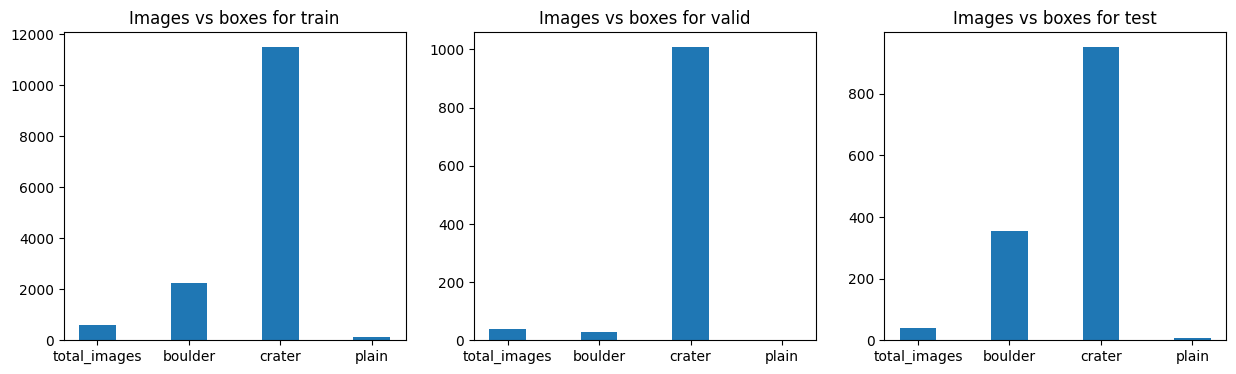

In [4]:
train_count, train_0, train_1, train_m = dataStatistics(CONFIG.TRAIN_DATA_PATH_LABELS)
val_count, val_0, val_1, val_m = dataStatistics(CONFIG.VAL_DATA_PATH_LABELS)
test_count, test_0, test_1, test_m = dataStatistics(CONFIG.TEST_DATA_PATH_LABELS)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 4))

plotStatistics(train_count, train_0, train_1, train_m, 'train', ax1)
plotStatistics(val_count, val_0, val_1, val_m, 'valid', ax2)
plotStatistics(test_count, test_0, test_1, test_m, 'test', ax3)


### YOLOv8 Pretrained-Model
Trained on custom dataset and using the initial weights of the pretrained model on google colab


### Testing

In [9]:
def evaluation(model, test_data_path = CONFIG.TEST_DATA_PATH_IMAGES):
    for img in os.listdir(test_data_path):
        model.predict(
            source = os.path.join(test_data_path, img), 
            save = True
        )


In [10]:
model = YOLO('./runs/detect/best.pt')
evaluation(model)



image 1/1 d:\Umair\ai-ml-labEL\datasets\craters-boulders\test\images\201_png.rf.726786a18bd7d93a2868fd316ce99f42.jpg: 640x640 1 large-crater, 2 medium-craters, 32 small craters, 1175.2ms
Speed: 277.6ms preprocess, 1175.2ms inference, 150.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict

image 1/1 d:\Umair\ai-ml-labEL\datasets\craters-boulders\test\images\201_png.rf.82e31700b85eaafd8c6e971aedf92454.jpg: 640x640 50 small craters, 100.5ms
Speed: 5.0ms preprocess, 100.5ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict

image 1/1 d:\Umair\ai-ml-labEL\datasets\craters-boulders\test\images\201_png.rf.9ba1152d9a82d33b331f33c2ce5ca874.jpg: 640x640 2 medium-craters, 40 small craters, 99.5ms
Speed: 4.0ms preprocess, 99.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict

image 1/1 d:\Umair\ai-ml-labEL\datasets\craters-boulders\test\images\201_png.rf

In [11]:
model.val(data = 'data.yaml', split = 'test')


Ultralytics 8.3.57  Python-3.12.6 torch-2.5.1+cpu CPU (Intel Core(TM) i7-9750H 2.60GHz)


val: Scanning D:\Umair\ai-ml-labEL\datasets\craters-boulders\test\labels... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<00:00, 69.85it/s]

val: New cache created: D:\Umair\ai-ml-labEL\datasets\craters-boulders\test\labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.54s/it]


                   all         40       1314       0.61      0.393      0.344      0.169
               boulder         26        355      0.552      0.107      0.342      0.162
          large-crater          4          4      0.568       0.75      0.485      0.243
         medium-crater         16         24       0.41      0.458      0.289      0.159
                 plane          5          7          1          0     0.0168    0.00508
          small crater         40        924      0.522      0.649      0.586      0.277
Speed: 4.8ms preprocess, 146.8ms inference, 0.0ms loss, 13.8ms postprocess per image
Results saved to runs\detect\val


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001E3CB6F29F0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
    

In [52]:
model.predict(
            source = fr'D:\Umair\ai-ml-labEL\flask-app\static\uploads\2_png.rf.0855af200c60973bedd137acaef5a418.jpg', 
            save = True,
            save_dir = fr'flask-app\static\results'
        )



image 1/1 D:\Umair\ai-ml-labEL\flask-app\static\uploads\2_png.rf.0855af200c60973bedd137acaef5a418.jpg: 640x640 7 boulders, 1 medium-crater, 49 small craters, 123.0ms
Speed: 4.0ms preprocess, 123.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict2


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'boulder', 1: 'large-crater', 2: 'medium-crater', 3: 'plane', 4: 'small crater'}
 obb: None
 orig_img: array([[[112, 112, 112],
         [111, 111, 111],
         [110, 110, 110],
         ...,
         [ 24,  24,  24],
         [ 23,  23,  23],
         [ 23,  23,  23]],
 
        [[111, 111, 111],
         [110, 110, 110],
         [110, 110, 110],
         ...,
         [ 24,  24,  24],
         [ 24,  24,  24],
         [ 23,  23,  23]],
 
        [[110, 110, 110],
         [109, 109, 109],
         [109, 109, 109],
         ...,
         [ 25,  25,  25],
         [ 25,  25,  25],
         [ 24,  24,  24]],
 
        ...,
 
        [[ 70,  70,  70],
         [ 68,  68,  68],
         [ 67,  67,  67],
         ...,
         [ 62,  62,  62],
         [ 61,  61,  61],
         [ 60,  60,  60]],
 
        [[ 71,  71,  71],
         [ 69